###### Maestría Inteligencia de Negocios y Análisis de Datos
###### Curso: Product Development
###### Alumno: 22008375- Leonel Eduardo Contreras
###### Sección L

## Laboratorio 2

#### Importar libreriras

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import webbrowser as wb

from pycaret.regression import *

#### Cargar archivo

In [129]:
# Ruta del dataset House Price
data_path='../data/raw/train_HP.csv'

In [130]:
# Cargar el dataset segun su ruta
dataset=pd.read_csv(data_path)

In [131]:
# Leer el dataset
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### EDA y Profiling de los datos

In [132]:
# Dimension del dataset
dataset.shape

(1460, 81)

In [133]:
# Columnas del dataset
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# El profiling se exporta a un archivo HTML para visualizarlo correctamente en la web, ya que en VSCode da problemas (genera pantalla gris)
profile = ProfileReport(dataset, title = "Reporte Profiling")
profile.to_file("reporte.html")
wb.open_new_tab('reporte.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

True

#### Descripción de los warnings generados en el EDA.

* Generó 115 alertas

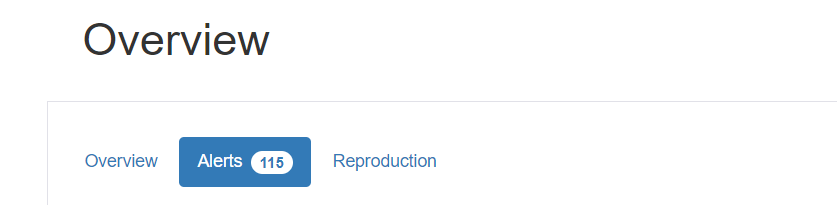

* 56 alertas son por alta correlación entre variables

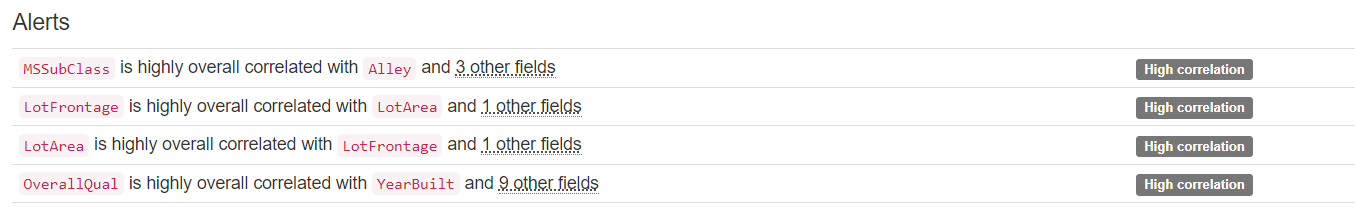

* 25 alertas son por no haber balance en las varaibles

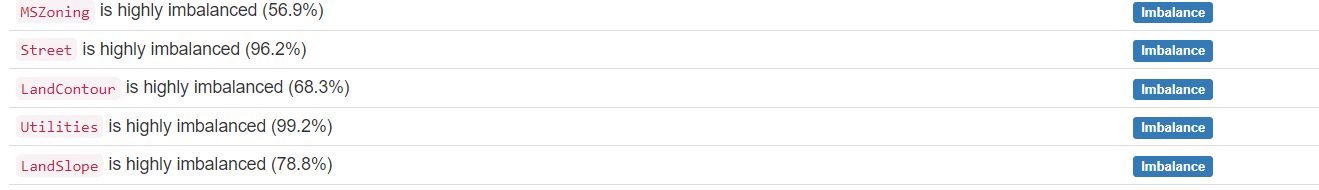

* 16 alertas por faltantes/nulos en las variables

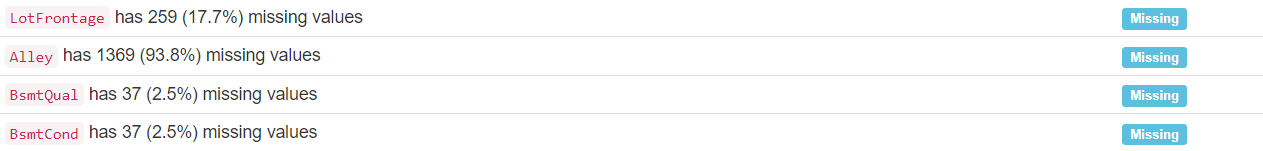

* 1 alerta por sesgo en una varaible

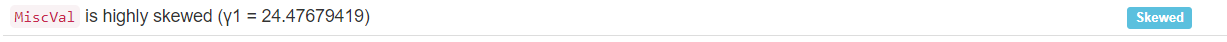

* 2 alertas en la variable Id por distribucion uniforme y valores unicos

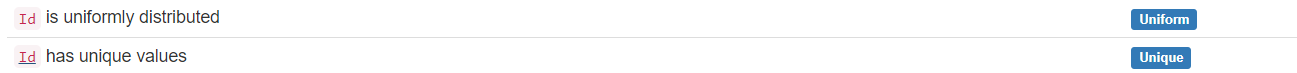

* 15 alertas por varaibles con muchos ceros

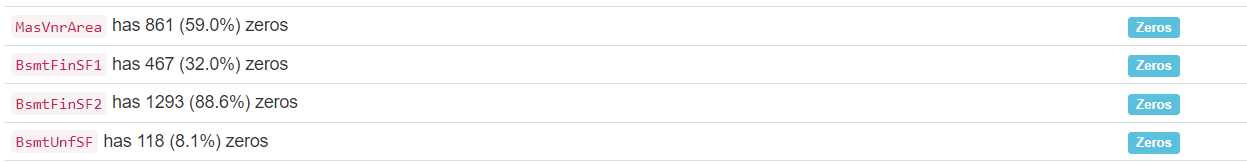

Eliminación de caracteristicas no utilizadas en el modelo

In [134]:
# Eliminar variables con nulos, segun las alertas generadas
var_nul=['LotFrontage','Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
         'GarageFinish','GarageQual','GarageCond','PoolQC','Fence','MiscFeature','GarageYrBlt']
         
dataset.drop(var_nul,axis=1, inplace=True)

In [135]:
# Eliminar la varaible Id, segun alertas generadas
dataset.drop('Id',axis=1, inplace=True)

Obtener tipos de varaibles categoricas

In [136]:
var_categoricas=[]
for col in dataset.columns:
    if(dataset[col].dtype=='object'):
        var_categoricas.append(col)

#### Split de los datos

In [137]:
# Cantidad de datos para el train
num_filas_train=int(len(dataset)*0.8)

# Obtener el train
data_train=dataset.sample(n=num_filas_train,random_state=2023)
# Obtener test
data_test=dataset.drop(data_train.index)

In [138]:
# Imprimir la cantidad de train y test
print(f'Filas en Train: {data_train.shape[0]}')
print(f'Filas en Test: {data_test.shape[0]}')

Filas en Train: 1168
Filas en Test: 292


#### Setup

In [139]:
dataset= setup(data=data_train,
               target='SalePrice', # Variable dependiente
               session_id=2023, # sesion para guardar los parametros del modelo y referenciarlos posteriormente
               remove_multicollinearity=True, # Eliminar características altamente correlacionadas
               numeric_imputation="mean", # Imputación de variables numéricas
               categorical_imputation= "mode", # Imputación de variables categóricas
               categorical_features=var_categoricas, # Codificación de variables categóricas
               transformation=True, # Activar transformacion, por default es yeo-johnson
               outliers_method= "lof", # Metodo de tratamiento de outliers
               normalize=True, # Activar Normalizacion
               normalize_method='minmax',
               log_experiment=True,
               experiment_name='Model_HousePrice' # identificador del modelo
               )

,Description,Value
0,Session id,2023
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1168, 64)"
4,Transformed data shape,"(1168, 204)"
5,Transformed train set shape,"(817, 204)"
6,Transformed test set shape,"(351, 204)"
7,Ordinal features,3
8,Numeric features,34
9,Categorical features,29


In [140]:
# Ver la tranformación de los datos
dataset.X_train_transformed

,MSSubClass,MSZoning_RL,MSZoning_FV,MSZoning_RH,MSZoning_RM,MSZoning_C (all),LotArea,Street,LotShape_IR1,LotShape_Reg,...,SaleType_ConLD,SaleType_ConLI,SaleType_Oth,SaleType_ConLw,SaleType_Con,SaleCondition_Normal,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Abnorml,SaleCondition_AdjLand
28,0.000000,1.0,0.0,0.0,0.0,0.0,0.511089,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
404,0.542989,1.0,0.0,0.0,0.0,0.0,0.421703,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1273,0.667362,1.0,0.0,0.0,0.0,0.0,0.442471,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
103,0.000000,1.0,0.0,0.0,0.0,0.0,0.422427,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
560,0.000000,1.0,0.0,0.0,0.0,0.0,0.439516,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,0.830746,1.0,0.0,0.0,0.0,0.0,0.324797,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
693,0.213090,1.0,0.0,0.0,0.0,0.0,0.291597,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
374,0.542989,1.0,0.0,0.0,0.0,0.0,0.375206,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
40,0.000000,1.0,0.0,0.0,0.0,0.0,0.386020,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Entrenamiento de Modelos

In [141]:
# Ordenar segun el mejor RMSE y retornar el top 3
best=compare_models(sort='RMSE', n_select=3) 

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:18:59
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17604.0926,803270846.2756,27010.2945,0.8598,0.1424,0.1034,0.7500
lightgbm,Light Gradient Boosting Machine,17647.8499,856025364.8831,28211.0377,0.8503,0.1434,0.1021,0.7710
rf,Random Forest Regressor,18366.2972,868358933.7460,28229.5426,0.8490,0.1494,0.1090,0.9730
et,Extra Trees Regressor,19018.4153,872770570.1952,28667.0073,0.8525,0.1476,0.1100,0.8660
huber,Huber Regressor,18833.2181,1105215769.0227,32004.8178,0.8123,0.1682,0.1046,0.5660
llar,Lasso Least Angle Regression,21235.4313,1140681000.4268,32430.4771,0.8014,0.2402,0.1312,0.5600
br,Bayesian Ridge,20937.0422,1154416882.4516,32682.8572,0.8012,0.1973,0.1210,0.5390
ridge,Ridge Regression,20998.6089,1180265842.6628,32840.0441,0.7953,0.1777,0.1231,0.4400
lasso,Lasso Regression,21794.6734,1269392309.7943,33693.3112,0.7769,0.2444,0.1343,0.4880
ada,AdaBoost Regressor,24306.7502,1233854122.3073,34491.7886,0.7876,0.1947,0.1546,0.6300


In [142]:
# Mejores 3 modelos 
best

[GradientBoostingRegressor(random_state=2023),
 LGBMRegressor(n_jobs=-1, random_state=2023),
 RandomForestRegressor(n_jobs=-1, random_state=2023)]

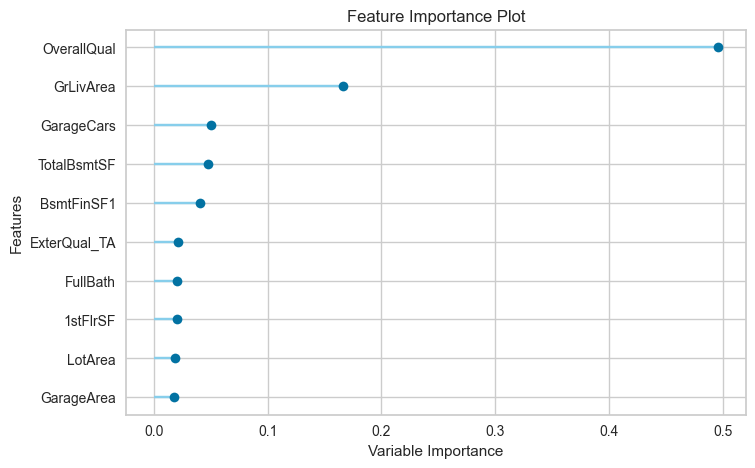

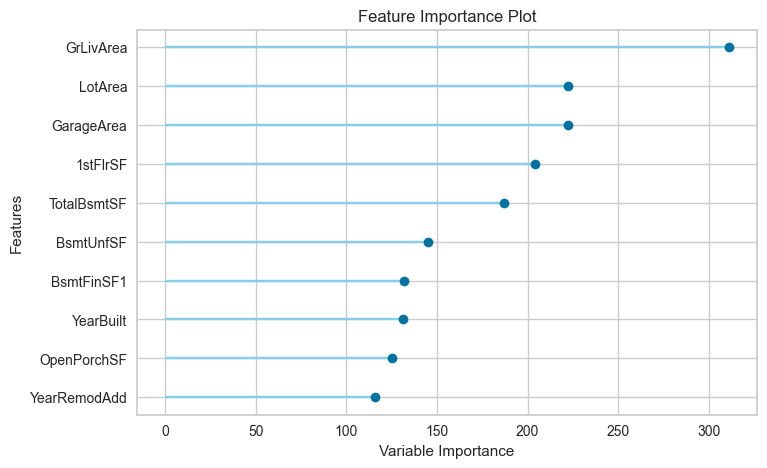

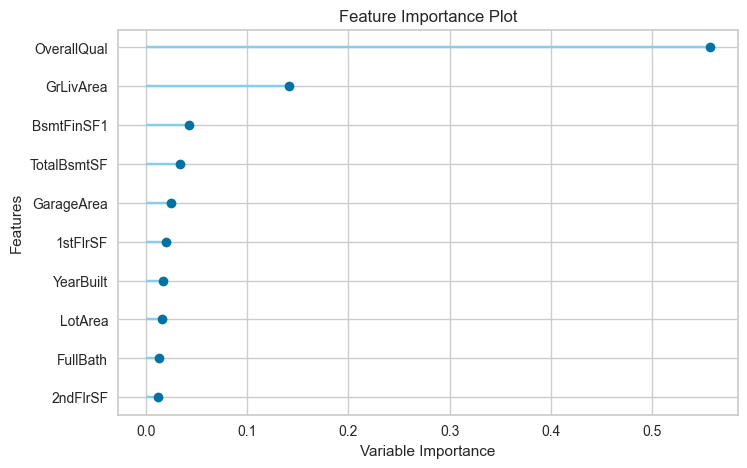

In [143]:
# Gráfica de Importancia de Características
for model in best:
    plot_model(model, plot='feature')

* Las características que son importantes por diferencia significativa en el rendimiento del modelo GradientBoostingRegressor son: OverallQual y GrLivArea, el resto no tienen diferencia significativa.
* La característica que es importante por diferencia significativa en el rendimiento del modelo LGBMRegressor es: GrLivArea, el resto de varaibles importantes son LotArea, TotalBsmtSF, GarageArea, 1stFlrSF, pero no es significativo su aporte al rendimiento como la primera mencionada.
* La característica que es importante por diferencia significativa en el rendimiento del modelo RandomForestRegressor es: OverallQual, seguida de GrLivArea, pero por mucha diferencia.
* En conlusion se puede decir que las varaibles que aportan mas son: OverallQual y GrLivArea

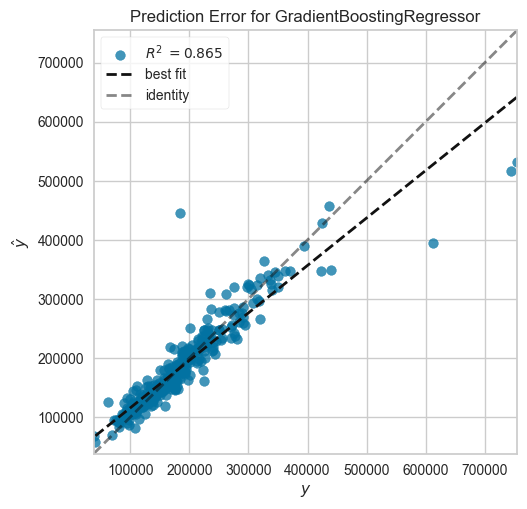

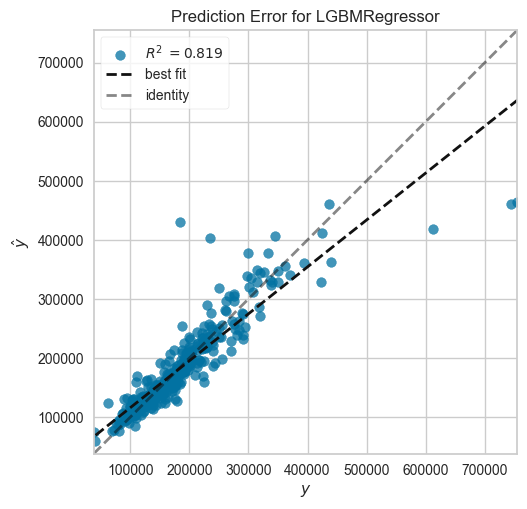

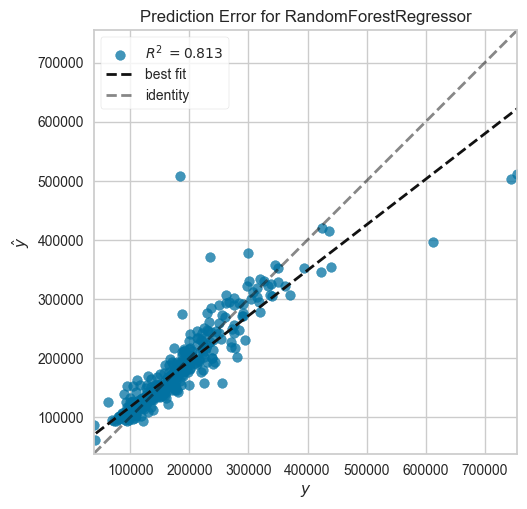

In [144]:
# Gráfica de Errores de Predicción vs. Real
for model in best:
    plot_model(model, plot='error')

#### Optimización de hiper-parámetros

Primer Modelo

In [145]:
model_1= create_model(best[0])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24798.9376,2556300082.4458,50559.8663,0.4969,0.2349,0.1602
1,15836.9790,583928201.9597,24164.6064,0.9247,0.1109,0.0845
2,19835.5336,1142954150.5016,33807.6049,0.8692,0.1231,0.0927
3,17749.9580,586304454.8737,24213.7245,0.8926,0.1448,0.1012
4,16936.2921,619312093.7079,24885.9819,0.8792,0.1244,0.0917
5,15869.4843,452707559.6087,21276.9255,0.9022,0.1532,0.1113
6,16775.8666,577062556.4485,24022.1264,0.8985,0.1343,0.0999
7,14809.6314,436372595.4538,20889.5332,0.9235,0.1333,0.0975
8,16067.3371,453993382.3765,21307.1205,0.9198,0.1283,0.0969


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [146]:
# Parametros
params= {
            'n_estimators':[50,100],
            'learning_rate':[0.01,0.1]
        }

# Personalizar los hiperparametros
tuned_model_1=tune_model(
    estimator=model_1,
    optimize='RMSE',
    fold=5,
    n_iter=50,
    custom_grid=params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19259.8255,1548247211.5720,39347.7726,0.7591,0.1840,0.1200
1,18987.1054,835469744.0248,28904.4935,0.8831,0.1383,0.1007
2,16555.9052,512020808.0795,22627.8768,0.8968,0.1343,0.0992
3,15377.4020,473219937.9614,21753.6190,0.9171,0.1309,0.0965
4,17152.7370,564306048.7933,23755.1268,0.9016,0.1340,0.1005
Mean,17466.5950,786652750.0862,27277.7777,0.8715,0.1443,0.1034
Std,1471.0688,401375163.5380,6524.9975,0.0573,0.0200,0.0084


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Segundo Modelo

In [147]:
model_2= create_model(best[1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,23960.1330,2433684478.9964,49332.3877,0.5211,0.2312,0.1561
1,16116.0988,768509674.7560,27722.0070,0.9009,0.1133,0.0832
2,18333.4009,1093301909.5449,33065.1162,0.8749,0.1243,0.0913
3,19122.5657,770556484.2202,27758.8992,0.8588,0.1536,0.1055
4,16566.3753,579245676.2855,24067.5233,0.8870,0.1205,0.0875
5,16219.9126,688113912.2728,26231.9254,0.8513,0.1617,0.1101
6,17185.2277,643223109.6396,25361.8436,0.8868,0.1314,0.0968
7,14839.0212,404043952.7579,20100.8446,0.9292,0.1323,0.0968
8,17149.7827,513825375.8407,22667.7166,0.9093,0.1338,0.0993


In [148]:
# Parametros
params= {
            'n_estimators':[50,100],
            'learning_rate':[0.01,0.1]
        }

# Personalizar los hiperparametros
tuned_model_2=tune_model(
    estimator=model_2,
    optimize='RMSE',
    fold=5,
    n_iter=50,
    custom_grid=params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18655.0620,1376141263.3986,37096.3780,0.7859,0.1699,0.1103
1,19219.0113,1012969641.6845,31827.1840,0.8583,0.1427,0.1011
2,16773.9931,638025840.4953,25259.1734,0.8714,0.1409,0.0989
3,16384.6242,570425468.5617,23883.5816,0.9001,0.1403,0.1003
4,17675.1081,630264229.0506,25105.0638,0.8901,0.1364,0.1012
Mean,17741.5597,845565288.6382,28634.2762,0.8611,0.1460,0.1024
Std,1076.9610,308111723.8271,5063.9429,0.0403,0.0121,0.0040


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


#### Selección del modelo final

In [149]:
# Mejor Modelo
print(tuned_model_1)

GradientBoostingRegressor(random_state=2023)


In [150]:
# Confirmar el mejor modelo
final_model=finalize_model(estimator=tuned_model_1) 

#### Almacenamiento del pipeline en el disco duro

In [151]:
# Guardar el modelo, en la carpeta models tipo .pkl (pipeline)
save_model(model=final_model,model_name='../models/model_lab2') 

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MSSubClass', 'LotArea',
                                              'OverallQual', 'OverallCond',
                                              'YearBuilt', 'YearRemodAdd',
                                              'MasVnrArea', 'BsmtFinSF1',
                                              'BsmtFinSF2', 'BsmtUnfSF',
                                              'TotalBsmtSF', '1stFlrSF',
                                              '2ndFlrSF', 'LowQualFinSF',
                                              'GrLivArea', 'BsmtFullBath',
                                              'BsmtHalfBath', 'FullBath',
                                              'HalfBath', 'BedroomAbvG...
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
    

#### Predicciones

In [152]:
# Cargar el modelo creado
model=load_model('../models/model_lab2')

Transformation Pipeline and Model Successfully Loaded


In [153]:
model

Pipeline(memory=FastMemory(location=C:\Users\LEONEL\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MSSubClass', 'LotArea',
                                             'OverallQual', 'OverallCond',
                                             'YearBuilt', 'YearRemodAdd',
                                             'MasVnrArea', 'BsmtFinSF1',
                                             'BsmtFinSF2', 'BsmtUnfSF',
                                             'TotalBsmtSF', '1stFlrSF',
                                             '2ndFlrSF', 'LowQualFinSF',
                                             'GrLivArea', 'BsmtFullBath',
                                             'BsmtHal...
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=2023))])

In [154]:
# Predicciones utilizando el modelo y data test
predicciones= predict_model(model,data=data_test) 
predicciones

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,15348.2910,504218036.7352,22454.7999,0.9152,0.1248,0.0928


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,prediction_label
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,5,2007,WD,Normal,181500,155491.712841
21,45,RM,7449,Pave,Reg,Bnk,AllPub,Inside,Gtl,IDOTRR,...,0,0,0,0,6,2007,WD,Normal,139400,142253.411049
27,20,RL,11478,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,...,0,0,0,0,5,2010,WD,Normal,306000,305860.269458
29,30,RM,6324,Pave,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,...,0,0,0,0,5,2008,WD,Normal,68500,71976.092896
31,20,RL,8544,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,...,0,0,0,0,6,2008,WD,Normal,149350,142445.275589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,RL,10000,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,12,2007,WD,Normal,240000,269759.311924
1449,180,RM,1533,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,...,0,0,0,0,8,2006,WD,Abnorml,92000,93645.473147
1451,20,RL,9262,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,5,2009,New,Partial,287090,260272.744049
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,8,2007,WD,Normal,175000,168547.938622


#### Cálculo de métricas de rendimiento

In [164]:
from sklearn.metrics import r2_score, mean_squared_error

In [167]:
# Calcula R2
r2 = r2_score(data_test['SalePrice'], predicciones['prediction_label'])
r2

0.915216643775415

In [168]:
# Calcula RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(data_test['SalePrice'], predicciones['prediction_label']))
rmse

22454.799859611932

In [169]:
# Calcula MSE (Mean Squared Error)
mse = mean_squared_error(data_test['SalePrice'], predicciones['prediction_label'])
mse

504218036.735228

In [171]:
# Calcula MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((data_test['SalePrice'] - predicciones['prediction_label']) / data_test['SalePrice'])) * 100
mape

9.277500079767451

* El modelo genero un R2 muy bueno, indicando que las predicciones se ajustan a los valores reales de la variable dependiente, se generó un mejor valor con los datos de prueba que los de entrenamiento.
* Al igual sucedió con el RMSE y MSE que los valores de las predicciones con el dato de prueba fueron mejores que con los datos de entrenamiento, al ser más bajos.
* Un valor más bajo de MSE o RMSE indica un mejor ajuste del modelo a los datos observados.
